In [2]:
#importing all the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *

#reading the given data and assigning it to [data]
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


The data looks fine in this instance.

In [3]:
from scipy import stats
for col in data.columns:
    print(col)

print(data['Hours'].dtypes)
print(data['Scores'].dtypes)

Hours
Scores
float64
int64


In [4]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Hours'], data['Scores'])#checking the stats of the data
print("Slope: ",slope)
print("Intercept: ",intercept)
print("r value: ",r_value)
print("p value: ",p_value)
print("Standard error: ",std_err)
print("R squared: ",r_value**2)

Slope:  9.775803390787473
Intercept:  2.4836734053731817
r value:  0.9761906560220887
p value:  9.132624467459331e-17
Standard error:  0.45294141201804755
R squared:  0.9529481969048358


The R-squared value shows us that there is a good fit, that means there is some correlation.

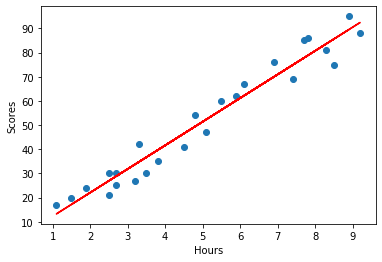

In [5]:
def predict(x):
    return slope * x + intercept

fitLine = predict(data['Hours'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data['Hours'], data['Scores'])
plt.plot(data['Hours'], fitLine, c='r')
plt.show()

We can see that there is some clear correlation between the scores obtained and the number of hours studied.

As we know, the formula for linear regression's fit line is y=mx+c, and we have m and c. We need to input x as 9.25, which will give us the y value for x at 9.25 hours.

In [6]:
y=(slope*9.25)+intercept
print("The predicted scores obtained for 9.25 hours of study as extrapolated from the given data is: ",y)

The predicted scores obtained for 9.25 hours of study as extrapolated from the given data is:  92.90985477015731


Therefore, for 9.25 hours of study, a student will get 92.91 marks.

Now let's use the scikit package for unsupervised machine learning and verify the answer.

In [7]:
a = data.iloc[:, :-1].values #we take -1 as we only need a single column instead of the entire dataset.
b = data.iloc[:, 1].values #we did this to segregate our attributes and labels.

We will now use the train_test_split() function from the python scikit (sklearn) package.

In [8]:
from sklearn.model_selection import train_test_split  
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=0) #taking 1/4th of the data

We will train the algorithm using our training and testing sets.

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(a_train, b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Since we have already plotted the data using mathematical methods, we can skip that step for now.

In [11]:
print(a_test) # a = hours
b_pred = regressor.predict(a_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [12]:
df = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})  
print(df)

   Actual  Predicted
0      20  16.844722
1      27  33.745575
2      69  75.500624
3      30  26.786400
4      62  60.588106
5      35  39.710582
6      24  20.821393


We can see the difference between the two sets of data already.

In [36]:
hours = 9.25
predict_marks = regressor.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_marks[0]))

No. of Hours = 9.25
Predicted Score = 93.89272889341655


Now let's evaluate the error in the predicted value.

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(b_test, b_pred)) 

Mean Absolute Error: 4.130879918502486


We have accomplished the required task.